# Regresión lineal
En este ejercicio implementarás la solución analítica de regresión lineal. Además, investigarás la influencia de los puntos extremos en el modelo. Antes de empezar importaremos las librerias necesarias. Después, leeremos el archivo que contiene los datos de entrenamiento.

**(TODO) Describe la diferencia entre regresión y clasificación en una oración**

## Ejercicio:
En la siguiente parte queremos implementar la solución de mínimos cuadrados para regresión lineal. Esto significa que dado un set de puntos $\{\mathbf{x_i},y_i\}$, $i = 1, 2, ..., M$ queremos encontrar la línea (o hiperplano en múltiples dimensiones) que minimice el error cuadrático. Este tipo de error, mide la distancia entre los puntos predichos por el modelo lineal contra los valores reales.

La fórmula general de regresión lineal es $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ donde:

- $\epsilon$ es un vector de dimensionalidad $\mathbb{R}^M$ conteniendo los términos de error $N(0,\sigma^2)$
- $\mathbf{y}$ es el vector de etiquedas
- $\mathbf{X}$ es la *matriz* de data points de dimensionalidad $\mathbb{R}^{M \times D}$. 

Nos interesa calcular los pesos $\hat{\boldsymbol w}$ que definan la función lineal óptima. Como vimos en clase, estos estimados están dados por:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

**Tu trabajo**
1. En el primer ejercicio, generaremos un ruido gausiano de dos dimensiones alrededor de una función lineal. Observa como se general los datos y cuáles son los parámetros reales de $\boldsymbol{w}$.
2. Implementarás la solución analítica de regresión lineal. Para ello debes realizar los siguientes pasos.
    1. Modifica la matriz de datos para que se encuentre en la forma de notación aumentada.
    2. Calcula los pesos estimados según la fórmula vista en clase, usando las funciones de numpy y python.
    3. Visualiza la línea resultante (el modelo) en la misma gráfica que de los datos originales.
    3. Calcula la suma de errores residuales de los data points y estima un promedio i.e. $\sum_{i=1}^M \|y(x_i) - y_i \|^2$.
    5. Compara tus resultados con la función integrada de numpy `np.linalg.lstsq(...)`
3. Finalmente, repite los pasos anteriores para generar un modelo de regresión lineal que resuelva del problema de las casas.

## 1. "Toy problem"

shape XnotAum: 
(100, 2)
shape Woptimo: 
(2, 1)
shape Ysom: 
(100, 1)
(100, 1)
(100, 1)
3.4055914891528865


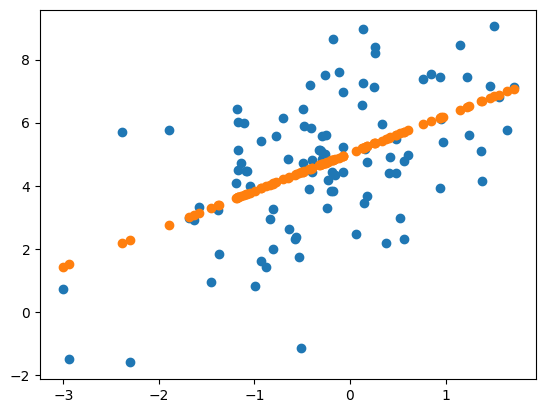

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generamos datos aleatorios con una desviación estandar conocida
## Alrededor de una funcion lineal conocida y = 1.2x + 5
n_muestras = 100
ruido_blanco_std = 2
X = np.random.randn(n_muestras, 1)
eps = np.random.randn(n_muestras, 1) * ruido_blanco_std
w = np.array([[5, 1.2]]).T
y = w[0] + X * w[1] + eps
XnotAum = np.hstack((np.ones((n_muestras, 1)), X))
Woptimo=np.linalg.inv(((XnotAum.T)@XnotAum))@XnotAum.T@y

## Imprimimos la dimensionalidad de nuestros datos de entrada y las etiquetas
print("shape XnotAum: ")
print(XnotAum.shape)
print("shape Woptimo: ")
print(Woptimo.shape)
Ysom=XnotAum@Woptimo
Error=(y-Ysom)**2
Promedio=np.mean(Error)

print("shape Ysom: ")
print(Ysom.shape)


print(X.shape)  # X es de n_muestras, 1 (variable)
print(y.shape)

print(Promedio)
## Graficar los datos
plt.scatter(X, y)
plt.scatter(X, Ysom)
##plt.scatter(Respuesta, y)

## 2. Solución a regresión lineal

In [44]:
# 2.1. TODO: Transforma los datapoints X a notación aumentada
# Tips: 
#   - Imprime la forma/dimensionalidad de la matriz con print(X.shape) y verifica que sea del tamaño adecuado
#   - Investiga la función de numpy np.concatenate y np.ones
n = X.shape[0]
ones = np.ones((n, 1))
print(ones.shape)
print(X.shape)

X_augmented = np.hstack((ones, X))
print(X_augmented.shape)

(100, 1)
(100, 1)
(100, 2)


In [45]:
# 2.2 TODO: usa la ecuación anterior (X'X)^(-1)X'Y para calcular los pesos
# Consejo: 
#       Utiliza np.dot() o @ para calcular la multiplicación de matrices
#       np.linalg.inv() se usa para calcular la matriz inversa
#       X.T es la transpuesta de X

w_hat = np.linalg.inv(((X_augmented.T)@X_augmented))@X_augmented.T@y
print(w_hat.shape)
print(w_hat)

(2, 1)
[[5.0336505 ]
 [1.19500393]]


(100, 1)


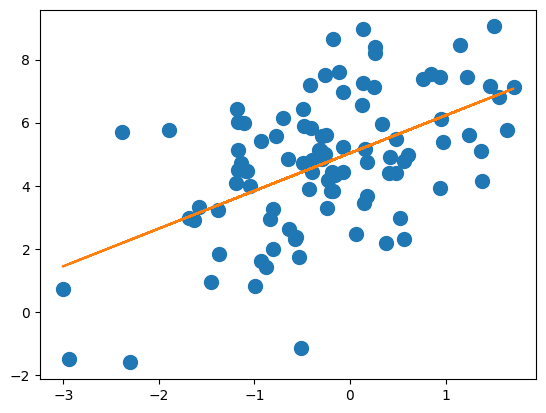

In [46]:
# 2.3 TODO: Calcula las predicciones de tu modelo
y_hat = X_augmented@w_hat
print(y_hat.shape)

plt.plot(X, y, 'o', label='Datos originales', markersize=10)

# TODO: Grafica las predicciones/ la linea resultante

plt.plot(X,y_hat)

Residuales mios: 

 [[1.42409882e+01]
 [2.40284196e-01]
 [3.09496063e+01]
 [1.09916038e+01]
 [2.17126564e+00]
 [4.33691586e+00]
 [2.69544776e+00]
 [1.16197975e+01]
 [2.37444818e-01]
 [1.50305746e-02]
 [9.05728964e+00]
 [7.00299488e-02]
 [3.99792292e+00]
 [2.48862089e-02]
 [7.26354128e-02]
 [9.08541768e-01]
 [4.01314310e-03]
 [2.57586932e-01]
 [1.12901102e+00]
 [2.03778519e+00]
 [2.19538765e-02]
 [4.12742137e-01]
 [7.65497232e-01]
 [3.01267451e+00]
 [6.59038578e+00]
 [3.31615003e-01]
 [5.40237678e-01]
 [2.47050382e-01]
 [5.12862207e-01]
 [4.14287801e+00]
 [5.60642692e+00]
 [7.92780153e-02]
 [6.70415148e-01]
 [2.11670670e+00]
 [2.03877573e+00]
 [5.50135728e+00]
 [1.24120202e+00]
 [1.42667416e-02]
 [6.34575067e-01]
 [3.18928386e+00]
 [8.11833580e+00]
 [5.21014942e+00]
 [3.99320160e-02]
 [4.86930809e-02]
 [6.94248606e+00]
 [4.89808107e-01]
 [2.19742932e+00]
 [3.75737609e-01]
 [4.99126089e+00]
 [7.88766576e+00]
 [1.71345657e+00]
 [1.46055589e+01]
 [2.10718017e-01]
 [6.57705766e-01]
 [4.29268175e+00]
 [2.45283

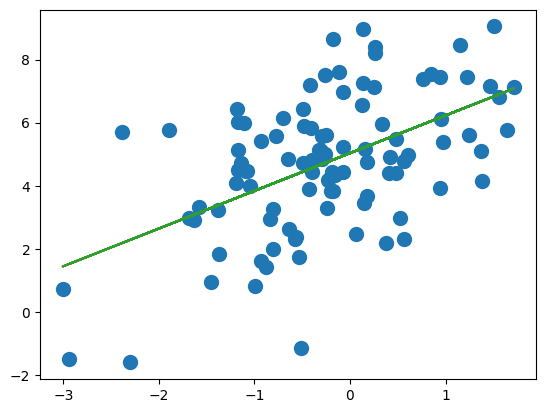

In [47]:
## 2.4 TODO: Calcula la suma de errores cuadrádos
residual_mio = (y-y_hat)**2

c, m = np.linalg.lstsq(X_augmented, y,rcond=None)[0]
y_hat2 = m*X + c

## 2.5 TODO: Compara los resultados con la función integrada de numpy 'np.linalg.lstsq'
residual_numpy = (y-y_hat2)**2

# Graficando
plt.plot(X, y, 'o', label='Datos originales', markersize=10)

# TODO: Grafica la linea resultante de TU modelo como en la sección anterior
plt.plot(X,y_hat)

# TODO: Grafica la linea resultante de numpy como en la sección anterior

plt.plot(X,y_hat2)

# TODO: Imprime y compara la suma de errores cuadrádos calculado por TU metodo y el de numpy
print("Residuales mios: ", residual_mio)
print("Residuales numpy:", residual_numpy)

## 3. El efecto de las anomalías

En esta sección analizaremos los datos del problema de las casas para buscar una solución a través de regresión lineal.

Para ello observaremos los datos y aplicaremos un modelo de regresión lineal a los mismos. Después realizarás los mismo pasos en un conjunto con datos filtrados a fin de encontrar un mejor modelo.

Tu trabajo:
1. Utiliza la librería de scikit-learn para encontrar la solución de regresión lineal para el problema de las casas usando el **conjunto de datos de entrenamiento (train_data)**
2. Calcula el error cuadrático en el **conjunto de validación (val_data)**.
3. Repite los dos pasos anteriores para los datos filtrados y observa la diferencia.

In [48]:
# Importar librerias
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [49]:
import pandas as pd
import os
def read_data(data_dir, file):
    path = os.path.abspath(os.path.join(data_dir, file))
    print(path)
    df = pd.read_csv(path)
    return df

# Leer los datasets
data_dir = "../../datasets/house_prices"
data = read_data(data_dir, "train.csv")

# Filtrar los datos para seleccionar las columnas de interes
# y dejar solo los datos del 2010
selected_dim = ["LotArea", "SalePrice"]
data = data[data["YrSold"] <= 2009]
data = data[selected_dim]

# Separamos los datos en diferentes conjuntos
n_datapoints = len(data)
#print(n_datapoints)
train_data = data[:-n_datapoints//4]
#print(train_data)
val_data = data[-n_datapoints//4:]
#print(val_data)

c:\Users\Atofi\Documents\repos_github\SI24_Sistemas0Inteligentes\src\si24\datasets\house_prices\train.csv


## Visualización
En la siguiente celda visualizamos los datos originales. Observa como contine una distribución densa para cases con un area menor a 50k sqft y un precio menor a 600k USD, y por otro lado contiene datos escasos fuera de estos rangos.

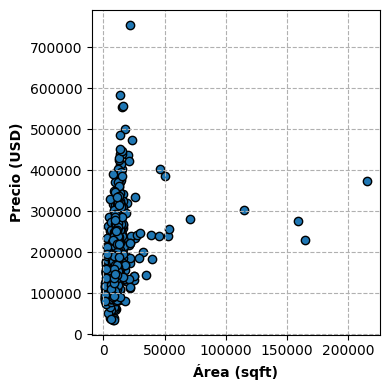

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(x, labels):
    x_label = "Área (sqft)"
    y_label = "Precio (USD)"
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(x, labels, edgecolors='black') # x, y
    ax.set_ylabel(y_label, fontweight='bold')
    ax.set_xlabel(x_label, fontweight='bold')
    ax.grid(linestyle='--')
    return fig, ax

# Definir variables y etiquetas
X = np.array(train_data["LotArea"])
y = np.array(train_data["SalePrice"])

# Visualizar los datos originales
fig, ax = plot_data(X, y)
fig.tight_layout()
plt.show()

### Regresión en datos originales

Primero aplicaremos regresión lineal a los datos íntegros para observar el efecto de conservar los datos extremos en el entrenamiento del modelo.

Puedes consultar la documentación de sci-kit learn para  [regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) en línea para obtener detalles de como utilizar la función.

0.06454217536897422
[178294.7073428  180308.28823037 183197.33906905 180220.74123526
 188467.66817477 188213.78188895 181155.74314305 181677.52323392
 174215.0173706  176491.23924351 183109.79207394 184377.47256316
 186205.45382109 182150.27700752 182619.52890132 174215.0173706
 182393.65765393 187478.38713001 176736.37082982 188388.87587917
 176542.01650067 180556.92169649 170895.23531597 188415.1399777
 192076.35531327 174572.20911066 178382.25433792 178459.29569361
 182845.4001487  176303.88867397 186993.37677709 182512.72156728
 178438.28441479 174074.94217843 178658.90284247 193098.90421617
 179572.89347143 179607.91226948 177410.48269218 185949.81659536
 182927.69432411 171301.45337329 177055.04189202 187783.050673
 174425.13015887 251520.76499404 175990.47043147 181315.07867415
 168130.50121035 183888.96033043 187455.62491128 176106.03246501
 186387.55157092 176106.03246501 174778.82001912 179914.32675237
 180292.52977125 182173.03922625 190801.67106445 187401.34577431
 176804.6

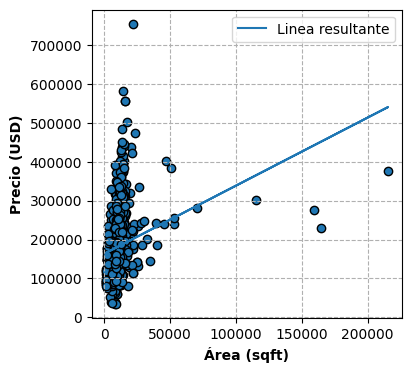

In [51]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1, 1)

# TODO: Usas la funcion integrada de scikit learn para encontrar un modelo de regresión lineal que se ajuste a los datos de entrenamiento y obtén las predicciones
modelo = LinearRegression().fit(X,y)
r_sq= modelo.score(X,y) #El mejor que puede haber es 1.0
print(r_sq) 
preds = modelo.predict(X)
print(preds)

# Graficamos los datos originales
fig, ax = plot_data(X, y)
# TODO: Grafica la linea resultante sobre los datos originales

plt.plot(X, preds, label='Linea resultante', markersize=10)
plt.legend()

# TODO: calcula el error cuadrado promedio
error_sklearn = (y-preds)**2
mean_error = np.mean(error_sklearn)
print(mean_error)


## Pre-procesamiento de datos
Como observamos, estos datos presentan múltiples valores aislados lo que afecta la solución de regresión lineal. 

En la siguiente sección, remueve los valores aislados y repite los pasos anteriores para encontrar un modelo de regresión lineal. C

Calcula el error cuadrático los datos filtrados. 

(TODO: Responde) ¿Cuál es el efecto de pre procesar los datos?

C:\Users\Atofi\AppData\Local\Temp\ipykernel_18676\874872387.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_data_filtrada = train_data_filtrada[train_data["SalePrice"] <= 300000]


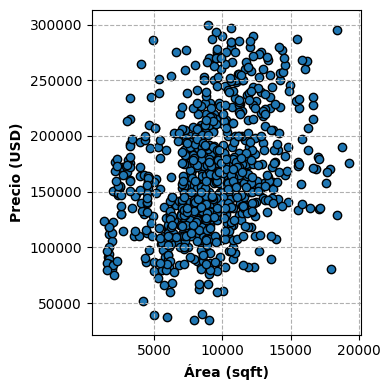

In [52]:
# TODO: Remueve los outliers seleccionando un valor que consideres apropiado (filtra los valores de LotArea y  SalePrice=) hasta que los datos se encuentren densamente concentrados en una región
train_data_filtrada = train_data[train_data["LotArea"] <= 20000]
train_data_filtrada = train_data_filtrada[train_data["SalePrice"] <= 300000]

# Definir variables y etiquetas
X_filtered = np.array(train_data_filtrada["LotArea"])
y_filtered = np.array(train_data_filtrada["SalePrice"])

# Graficar de nuevo
fig, ax = plot_data(X_filtered, y_filtered)
fig.tight_layout()
plt.show()

### Regresión en datos filtrados

2351814897.875033
diferencia de error 3562975998.963574


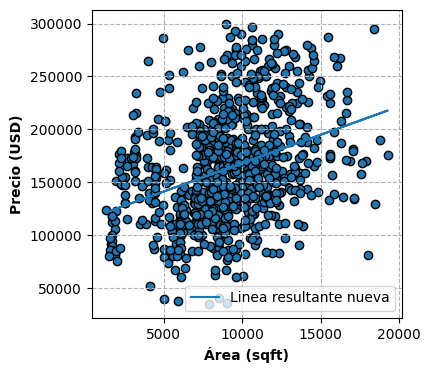

In [53]:
X_filtered = X_filtered.reshape(-1, 1)

# TODO: Utiliza la clase de LinearRegression de la librería de sci-kit learn para encontrar el modelo de regresión lineal para los datos.
modelo_new = LinearRegression().fit(X_filtered,y_filtered)
preds_new = modelo_new.predict(X_filtered)
# TODO: Grafica la linea resultante sobre los datos originales (train_data)

fig, ax = plot_data(X_filtered, y_filtered)

plt.plot(X_filtered, preds_new, label='Linea resultante nueva', markersize=10)
plt.legend()

# TODO: calcula el error cuadrado promedio

error_sklearn_new = (y_filtered-preds_new)**2
mean_error_new = np.mean(error_sklearn_new)

# Visualiza como cambia el error cuando filtramos los datos
print(mean_error_new)
print("diferencia de error", mean_error - mean_error_new)

## TODO: Responde las siguientes preguntas

**¿Qué puedes concluir de este ejemplo?**
Que dependiendo los datos que tenemos, podemos tener errores muy grandes y que, en caso de regresion lineal, resulta conveniente hacer un filtrado para filtrar las anomalias (en este caso que podemos observarlas)

**¿Cuál de las dos soluciones es un mejor modelo de nuestros datos?**
El modelo filtrado

**¿Además de filtrar los datos, qué estrategias puedes tomar para penalizar más levemente a los valores aislados?**
Probablemente el numero de muestras de datos, ya que al existir mas, influyen en el error 
